In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.decomposition import PCA


In [2]:
iris_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
                      names=['sepal_length', 'sepal width', 'petal length', 'petal width', 'class'])
x = iris_df.drop('class', axis=1)
y = iris_df['class']


In [3]:
shuffled = iris_df.sample(frac=1)
shuffled

,sepal_length,sepal width,petal length,petal width,class
101,5.8,2.7,5.1,1.9,Iris-virginica
117,7.7,3.8,6.7,2.2,Iris-virginica
97,6.2,2.9,4.3,1.3,Iris-versicolor
149,5.9,3.0,5.1,1.8,Iris-virginica
108,6.7,2.5,5.8,1.8,Iris-virginica
...,...,...,...,...,...
93,5.0,2.3,3.3,1.0,Iris-versicolor
45,4.8,3.0,1.4,0.3,Iris-setosa
143,6.8,3.2,5.9,2.3,Iris-virginica
82,5.8,2.7,3.9,1.2,Iris-versicolor


In [5]:
X = shuffled.iloc[:, :-1].values
Y = shuffled['class'].values
X

array([[5.8, 2.7, 5.1, 1.9],
       [7.7, 3.8, 6.7, 2.2],
       [6.2, 2.9, 4.3, 1.3],
       [5.9, 3. , 5.1, 1.8],
       [6.7, 2.5, 5.8, 1.8],
       [5.5, 4.2, 1.4, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [6.3, 2.9, 5.6, 1.8],
       [4.7, 3.2, 1.3, 0.2],
       [5. , 3.3, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [7.7, 3. , 6.1, 2.3],
       [5. , 3.5, 1.3, 0.3],
       [5.2, 3.5, 1.5, 0.2],
       [7.2, 3.2, 6. , 1.8],
       [6. , 2.9, 4.5, 1.5],
       [5.8, 2.7, 5.1, 1.9],
       [6.9, 3.2, 5.7, 2.3],
       [6.2, 2.8, 4.8, 1.8],
       [5.3, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [6. , 2.2, 4. , 1. ],
       [5.1, 2.5, 3. , 1.1],
       [5.8, 2.6, 4. , 1.2],
       [5.2, 4.1, 1.5, 0.1],
       [6.6, 3. , 4.4, 1.4],
       [6.7, 3.1, 5.6, 2.4],
       [4.6, 3.2, 1.4, 0.2],
       [5.1, 3.4, 1.5, 0.2],
       [6.3, 2.8, 5.1, 1.5],
       [6.5, 3. , 5.5, 1.8],
       [6.4, 3.1, 5.5, 1.8],
       [5.4, 3.9, 1.7, 0.4],
       [6.5, 3. , 5.2, 2. ],
       [4.8, 3

In [6]:
Y

array(['Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versic

In [7]:
shuffled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 101 to 118
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [8]:
shuffled.describe()

,sepal_length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<Axes: xlabel='class', ylabel='count'>

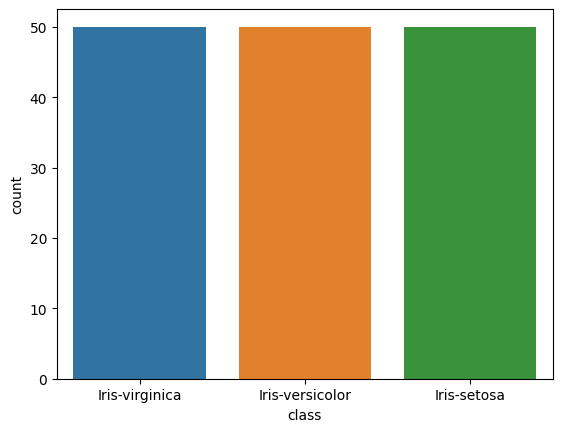

In [9]:
sns.countplot(x='class', data=shuffled)

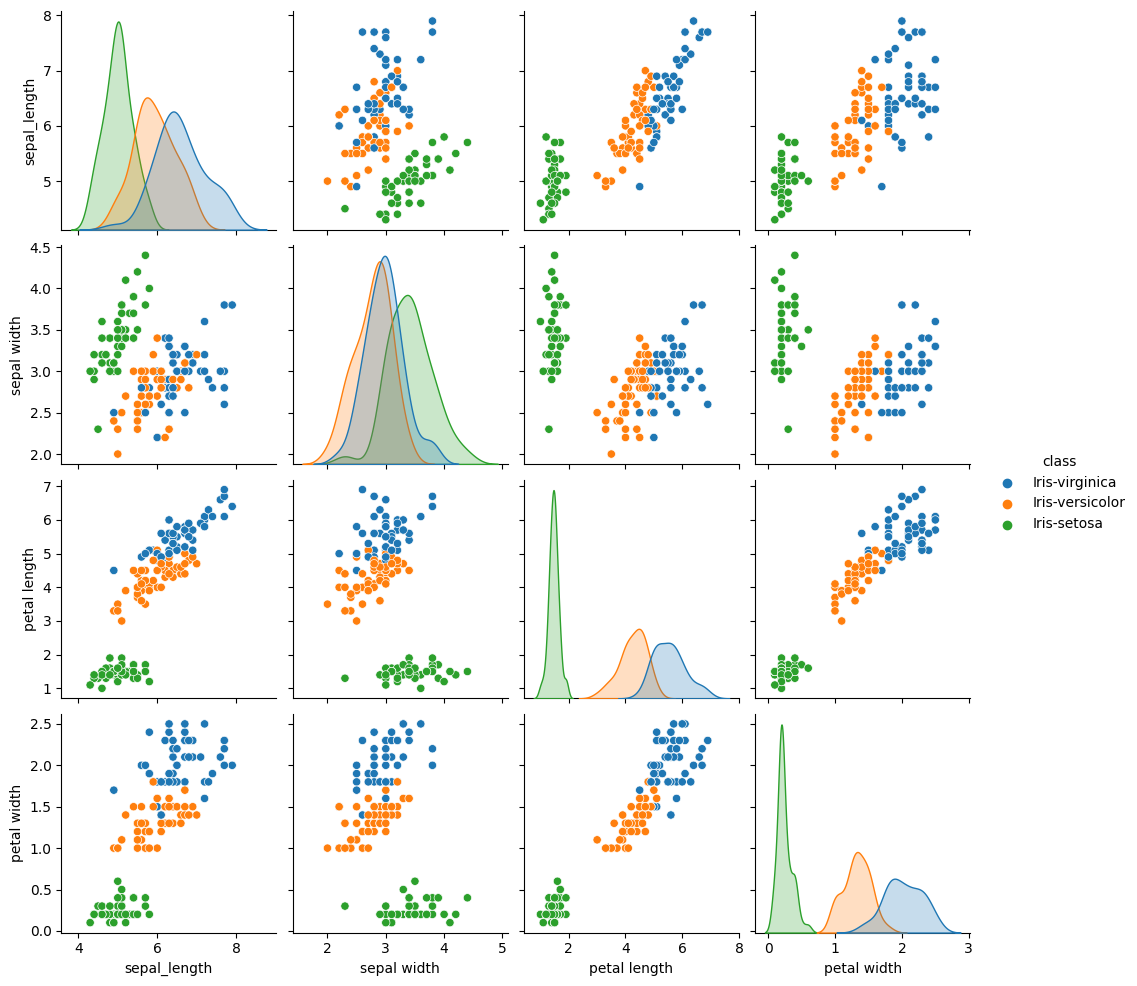

In [10]:
shuffled['class'].value_counts()
sns.pairplot(shuffled, hue='class')
plt.show()

In [12]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [14]:
# Preprocess the data using PCA
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
X_train_pca

array([[-4.63794284e-01, -1.49682876e+00],
       [ 6.55012472e-01, -2.26655306e-01],
       [ 1.04166227e-01, -1.51796339e+00],
       [ 2.76766902e+00,  8.12336995e-01],
       [ 2.74540056e-01, -8.36317131e-01],
       [-2.04792511e+00, -6.63329334e-01],
       [-1.86977465e+00, -2.24670713e+00],
       [-2.35910556e+00, -3.46923367e-01],
       [ 1.96438284e+00, -7.08961314e-01],
       [-2.01408191e+00,  1.47709563e+00],
       [ 6.18940135e-01, -4.07538079e-01],
       [-2.17654781e+00, -1.67643631e-01],
       [ 1.58088158e+00,  1.01113027e+00],
       [ 1.13572038e+00, -6.99274200e-01],
       [-2.05939394e+00, -6.25034677e-01],
       [-2.11340000e+00,  1.04861771e+00],
       [-2.13395031e+00,  1.84754752e+00],
       [ 3.73726855e-01, -1.70977026e+00],
       [-2.19144626e+00,  2.47783734e-01],
       [ 2.40078331e+00,  2.36031357e-01],
       [-2.40262046e+00, -8.51355878e-01],
       [ 1.00176655e+00, -1.34613301e+00],
       [-2.15681696e+00, -4.24480995e-01],
       [ 1.

In [16]:
X_test_pca

array([[ 1.09768195e+00,  8.39429251e-01],
       [ 1.15512406e+00, -3.20710228e-01],
       [ 6.19661652e-01,  1.90356719e-02],
       [ 1.17638946e+00, -1.58371190e+00],
       [-2.15681696e+00, -4.24480995e-01],
       [ 1.33908460e+00,  3.94292219e-01],
       [ 2.61405385e-01, -1.09378922e+00],
       [ 1.58431120e+00,  6.33997565e-01],
       [ 6.90488156e-01, -6.10608475e-02],
       [ 7.09274689e-01, -1.87091203e-01],
       [ 1.52671088e+00, -8.87745641e-01],
       [-2.24038379e+00,  4.60118525e-01],
       [ 7.53511106e-01,  7.43915058e-01],
       [-2.16756428e+00,  4.03874127e-02],
       [-2.17547220e+00,  1.00348041e+00],
       [ 2.72284238e+00,  7.56688037e-01],
       [ 9.17484634e-01,  2.53837752e-03],
       [-1.93159069e+00, -5.78627935e-01],
       [-2.07781995e+00,  1.13619159e+00],
       [ 1.85066501e+00,  2.61942641e-01],
       [ 1.09516973e+00, -2.94196679e-01],
       [-1.78627240e+00,  1.07956794e-01],
       [ 1.99941292e+00,  5.71394661e-01],
       [-2.

### **Implementation Of K-Means Clustering From Scratch**

In [15]:
import random

def initialize_centroids(X_train_pca, K):
    centroids = random.sample(list(X_train_pca), K)
    return centroids

centroids = initialize_centroids(X_train_pca, K=3)
print("Random_Centroids")
centroids

Random_Centroids


[array([1.99232445, 0.99239522]),
 array([-2.00356382,  0.67896236]),
 array([ 1.42337294, -0.06373355])]

In [18]:
import numpy as np

def assign_clusters(X_train_pca, centroids):
    clusters = np.zeros(len(X_train_pca))
    for i in range(len(X_train_pca)):
        distances = [np.linalg.norm(X_train_pca[i]-centroid) for centroid in centroids]
        print(i, distances)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    return clusters

clusters = assign_clusters(X_train_pca, centroids)
print("CLustering_Done...")
clusters

0 [3.496963719371491, 2.6655125673267412, 2.3696333102942027]
1 [1.8095545069494599, 2.8085888430043764, 0.785443386903186]
2 [3.141184781328959, 3.0445046784604104, 1.963438512780476]
3 [0.7959774894569137, 4.773096652209482, 1.604565840873668]
4 [2.5089782958501052, 2.7360243487754192, 1.3844502141145136]
5 [4.366353201665451, 1.3430245431682715, 3.5227014146483993]
6 [5.0405945549453035, 2.9287269467288457, 3.950973893042923]
7 [4.55288012646731, 1.085749262030392, 3.7930647408582807]
8 [1.7015859617498015, 4.203680872939271, 0.8420276579369246]
9 [4.0356197048165825, 0.7982025690203313, 3.766994878823015]
10 [1.961121546632826, 2.838663457937025, 0.8748220959493134]
11 [4.327260807170321, 0.8640978941424169, 3.6014201036519435]
12 [0.41186919898951974, 3.5998033830315572, 1.0863430437669221]
13 [1.8961845802658202, 3.428504240659204, 0.6976072800581197]
14 [4.362625515199563, 1.3051916652491566, 3.5277080546020145]
15 [4.106109379188562, 0.38562813766548953, 3.707571735984729]
16 [

array([2., 2., 2., 0., 2., 1., 1., 1., 2., 1., 2., 1., 0., 2., 1., 1., 1.,
       2., 1., 0., 1., 2., 1., 2., 2., 2., 1., 1., 1., 2., 1., 1., 2., 2.,
       2., 2., 2., 1., 2., 0., 2., 2., 0., 2., 2., 2., 2., 0., 1., 2., 0.,
       1., 2., 2., 1., 1., 1., 2., 2., 2., 1., 2., 2., 2., 2., 2., 1., 1.,
       1., 1., 2., 0., 1., 2., 1., 1., 0., 0., 2., 2., 2., 0., 1., 2., 1.,
       2., 2., 0., 0., 1., 1., 1., 0., 2., 2., 0., 2., 1., 2., 0., 2., 2.,
       2., 1., 0., 2., 2., 2., 0., 2., 1., 0., 0., 0., 1., 2., 1., 0., 2.,
       2.])

In [19]:
def update_centroids(X_train_pca, clusters, K):
    centroids = np.zeros((K, X_train_pca.shape[1]))
    for k in range(K):
        Xk = X_train_pca[clusters == k]
        print(Xk)
        centroids[k,:] = np.mean(Xk, axis=0)
    return centroids

centroids = update_centroids(X_train_pca, clusters, K=3)
print("Centroids_Updated...")
centroids

[[ 2.76766902  0.81233699]
 [ 1.58088158  1.01113027]
 [ 2.40078331  0.23603136]
 [ 2.18242271  0.5265585 ]
 [ 1.88568866  0.651653  ]
 [ 2.26390501  1.84090538]
 [ 1.86474401  0.38860772]
 [ 2.0261343   0.86222293]
 [ 1.36002925  0.6573375 ]
 [ 1.84392421  0.53684788]
 [ 1.84263223  0.81375021]
 [ 2.02979315  0.81835509]
 [ 2.27415362  0.39208247]
 [ 1.3795373   0.95788089]
 [ 2.3158068   2.53808062]
 [ 1.83720317  0.63987189]
 [ 2.43734104  2.46339548]
 [ 1.69816032  0.96502466]
 [ 1.99232445  0.99239522]
 [ 2.85773409  0.38209422]
 [ 3.25758327 -0.00963161]
 [ 1.94324231  0.9653258 ]]
[[-2.04792511 -0.66332933]
 [-1.86977465 -2.24670713]
 [-2.35910556 -0.34692337]
 [-2.01408191  1.47709563]
 [-2.17654781 -0.16764363]
 [-2.05939394 -0.62503468]
 [-2.1134      1.04861771]
 [-2.13395031  1.84754752]
 [-2.19144626  0.24778373]
 [-2.40262046 -0.85135588]
 [-2.15681696 -0.42448099]
 [-2.12937406  0.29292103]
 [-2.18412856  0.16004804]
 [-1.87742641  0.42960236]
 [-2.39905955  0.07344247]


array([[ 2.09280426,  0.88373893],
       [-2.19714506,  0.31181796],
       [ 0.72145015, -0.55025819]])

In [20]:
def k_means(X_train_pca, K, max_iterations):
    centroids = initialize_centroids(X_train_pca, K)
    for i in range(max_iterations):
        clusters = assign_clusters(X_train_pca, centroids)
        old_centroids = centroids
        centroids = update_centroids(X_train_pca, clusters, K)
        if np.all(old_centroids == centroids):
            break
    return clusters, centroids

clusters, centroids = k_means(X_train_pca, K=3, max_iterations=100)
clusters, centroids

0 [4.0935743816794, 3.8769482854435506, 2.1680077845911367]
1 [3.8311280582164478, 3.770496843481095, 2.83217514021106]
2 [4.404145701853215, 4.224739181374881, 2.6504754255492085]
3 [5.301182566688367, 5.393003451459357, 5.040400987831765]
4 [3.9703244191366944, 3.8403541386269366, 2.5406605419746513]
5 [2.808547882882527, 2.4905836258003458, 0.5121016659499019]
6 [4.401913933217264, 4.080354860842355, 2.1015743638034463]
7 [2.4738673822528012, 2.132991789206288, 0.25586823897676925]
8 [5.177954419267435, 5.143911732915302, 4.176162295598099]
9 [0.7399267277861451, 0.604518085739222, 1.6527439028438224]
10 [3.9172590124662636, 3.8400149746021777, 2.805762322467252]
11 [2.3025394035146527, 1.9794847138980325, 0.0]
12 [4.103428453354245, 4.189837170793468, 3.937992328341033]
13 [4.5014433888247645, 4.43129476242699, 3.3546611792605168]
14 [2.769204782037949, 2.4507836060851873, 0.4721563287019834]
15 [1.1079438801117367, 0.8444796305832516, 1.2178995432709505]
16 [0.36441805070386013, 0

(array([2., 2., 2., 0., 2., 1., 1., 1., 2., 1., 2., 1., 0., 2., 1., 1., 1.,
        2., 1., 0., 1., 2., 1., 2., 0., 2., 1., 1., 1., 0., 1., 1., 2., 2.,
        2., 2., 2., 1., 2., 0., 2., 0., 0., 2., 2., 2., 2., 0., 1., 2., 0.,
        1., 2., 0., 1., 1., 1., 0., 2., 2., 1., 2., 2., 0., 2., 2., 1., 1.,
        1., 1., 2., 0., 1., 2., 1., 1., 0., 0., 2., 2., 2., 0., 1., 2., 1.,
        2., 2., 0., 0., 1., 1., 1., 0., 2., 2., 0., 2., 1., 2., 0., 2., 2.,
        0., 1., 0., 0., 2., 0., 0., 2., 1., 0., 0., 0., 1., 2., 1., 0., 0.,
        2.]),
 array([[ 1.84515896,  0.69898439],
        [-2.19714506,  0.31181796],
        [ 0.60084824, -0.7258379 ]]))

In [22]:
#Apply the K-Means in X_test_pca


clusters, centroids = k_means(X_test_pca, K=3, max_iterations=100)
clusters, centroids

0 [0.3399628266096726, 3.1692929382658335, 0.9489332312215958]
1 [0.8325635552890263, 2.2511762554070702, 0.9073376366132913]
2 [0.6429990033265969, 2.220873509634662, 1.254740241295367]
3 [2.092146889982376, 1.6084431307699485, 1.9649651947753919]
4 [3.3306328560327016, 2.3431317243768155, 4.065844213820717]
5 [0.31695889743439326, 2.9197884723492873, 0.5284230650377776]
6 [1.7782543835201698, 1.082544051523113, 2.088960276901493]
7 [0.5578908652031319, 3.2585819070483133, 0.4575688160814039]
8 [0.6654266311448019, 2.1838626645308805, 1.2043012893439329]
9 [0.7669977171109598, 2.0850020049500673, 1.2265411804788309]
10 [1.4739108254512225, 2.194116088750061, 1.1944577971891912]
11 [3.2824323347629214, 3.048426588333153, 4.0958459450668725]
12 [0.3749612423885435, 2.935124555902384, 1.19835057802924]
13 [3.2426456811247735, 2.6781608257571534, 4.02433265753063]
14 [3.2557527766162453, 3.461539298550008, 4.093856265944769]
15 [1.69995882454306, 4.129867148626389, 1.002729456222257]
16 [

(array([2., 0., 0., 0., 1., 2., 0., 2., 0., 0., 0., 1., 2., 1., 1., 2., 0.,
        1., 1., 2., 0., 1., 2., 1., 1., 0., 1., 2., 0., 2.]),
 array([[ 0.71879538, -0.69387174],
        [-2.09846985,  0.20518475],
        [ 1.53857415,  0.54871397]]))

# **Some Other Classifiers**

In [ ]:
from sklearn.metrics import confusion_matrix,mean_squared_error,precision_score,recall_score,f1_score ,classification_report
# Train and evaluate multiple models
# Decision Tree Classifier
dt = DecisionTreeClassifier()
dt.fit(X_train_pca, y_train)
y_pred_dt = dt.predict(X_test_pca)
confusion_matrix_dt = confusion_matrix(y_test, y_pred_dt)
print("confusion_matrix_dt \n")
confusion_matrix_dt



confusion_matrix_dt 



array([[7, 0, 0],
       [0, 9, 3],
       [0, 3, 8]])

In [ ]:
# Naive Bayes Classifier
nb = GaussianNB()
nb.fit(X_train_pca, y_train)
y_pred_nb = nb.predict(X_test_pca)
confusion_matrix_nb = confusion_matrix(y_test, y_pred_nb)
print("confusion_matrix_nb\n ", confusion_matrix_nb)



confusion_matrix_nb
  [[2 4 4]
 [2 1 6]
 [4 2 5]]


In [ ]:
# K-Nearest Neighbors (KNN) Classifier
knn = KNeighborsClassifier()
knn.fit(X_train_pca, y_train)
y_pred_knn = knn.predict(X_test_pca)
confusion_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print("confusion_matrix_knn\n ", confusion_matrix_knn)



confusion_matrix_knn
  [[4 1 5]
 [2 3 4]
 [7 2 2]]


In [ ]:

svm = SVC()
svm.fit(X_train_pca, y_train)
y_pred_svm = svm.predict(X_test_pca)
confusion_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print("confusion_matrix_svm \n", confusion_matrix_svm)




confusion_matrix_svm 
 [[2 4 4]
 [2 2 5]
 [6 3 2]]


In [ ]:
# Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(X_train_pca, y_train)
y_pred_rf = rf.predict(X_test_pca)
confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("confusion_matrix_rf \n", confusion_matrix_rf)




confusion_matrix_rf 
 [[2 2 6]
 [3 2 4]
 [5 5 1]]


In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Instantiate the DBSCAN model
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Fit the model to the data
dbscan.fit(X_train_pca)

# Get the labels assigned to each data point
labels = dbscan.labels_

# Calculate the silhouette score
silhouette_dbscan = silhouette_score(X_train_pca, labels)

# Get the number ofclusters
n_clusters = len(set(labels)) 

# Print the results
print("Number of clusters:", n_clusters)
print("Cluster labels:", labels)
print("DBSCAN_Silhouette_Score:", silhouette_dbscan)

Number of clusters: 3
Cluster labels: [ 0  1  1  1  0  0  0  1  0  1  0  0  0  0  0  1  0  0  0  0  0  0  1  1
  1  1 -1  1  1 -1  1  0  1  1 -1  0  0  0  0  0  1  0  0  1  1  0  0  0
  1  1  1  0  0  1  1  0  1  0  0  0 -1  0  0 -1  1  0  0  0  0  1  0  0
  0  1  0  1  0  0  1  0  0  0  1 -1  0  0  1  0  0  1  1  1  1  0  1 -1
  0  1  0  0  0  0 -1  0  0  1  1  1  0  0  1 -1  0  0 -1 -1  1  1  0  0]
DBSCAN_Silhouette_Score: 0.5088734758664711


In [ ]:
# Calculate train and test accuracies
dt_train_acc = accuracy_score(y_train, dt.predict(X_train_pca))
dt_test_acc = accuracy_score(y_test, y_pred_dt)
nb_train_acc = accuracy_score(y_train, nb.predict(X_train_pca))
nb_test_acc = accuracy_score(y_test, y_pred_nb)
knn_train_acc = accuracy_score(y_train, knn.predict(X_train_pca))
knn_test_acc = accuracy_score(y_test, y_pred_knn)
svm_train_acc = accuracy_score(y_train, svm.predict(X_train_pca))
svm_test_acc = accuracy_score(y_test, y_pred_svm)
rf_train_acc = accuracy_score(y_train, rf.predict(X_train_pca))
rf_test_acc = accuracy_score(y_test, y_pred_rf)



In [ ]:
# Create a dictionary of accuracies
accuracies = {'Model': ['Decision Tree', 'Naive Bayes', 'KNN', 'SVM', 'Random Forest'],
              'Train Accuracy': [dt_train_acc, nb_train_acc, knn_train_acc, svm_train_acc, rf_train_acc],
              'Test Accuracy': [dt_test_acc, nb_test_acc, knn_test_acc, svm_test_acc, rf_test_acc]}

# Convert the dictionary to a dataframe
df_accuracies = pd.DataFrame(accuracies)

# Print the dataframe
df_accuracies


,Model,Train Accuracy,Test Accuracy
0,Decision Tree,0.991667,0.266667
1,Naive Bayes,0.416667,0.266667
2,KNN,0.608333,0.300000
3,SVM,0.450000,0.200000
4,Random Forest,0.991667,0.166667


In [ ]:
# Generate new data points
X_new = np.array([[5.1, 3.5, 1.4, 0.2], [6.2, 2.8, 4.8, 1.8], [7.3, 3.0, 6.1, 2.2]])

# Preprocess the new data using PCA and StandardScaler
X_new_scaled = scaler.transform(X_new)
X_new_pca = pca.transform(X_new_scaled)

# Assign the new data points to clusters using the pre-trained K-Means model
test_dt = dt.predict(X_new_pca)
test_nb = nb.predict(X_new_pca)
test_knn = knn.predict(X_new_pca)
test_rf = rf.predict(X_new_pca)
test_svm = svm.predict(X_new_pca)

Predictions = {'Model': ['Decision Tree', 'Naive Bayes', 'KNN', 'SVM', 'Random Forest'],
              'Predicted Class': [test_dt, test_nb, test_knn, test_svm, test_rf]}

df_Predictions = pd.DataFrame(Predictions)

# Print the dataframe
df_Predictions              

,Model,Predicted Class
0,Decision Tree,"[Iris-versicolor, Iris-versicolor, Iris-virgin..."
1,Naive Bayes,"[Iris-versicolor, Iris-virginica, Iris-virginica]"
2,KNN,"[Iris-versicolor, Iris-virginica, Iris-setosa]"
3,SVM,"[Iris-versicolor, Iris-virginica, Iris-virginica]"
4,Random Forest,"[Iris-versicolor, Iris-virginica, Iris-virginica]"
